In [2]:
import numpy as np
from scipy import stats

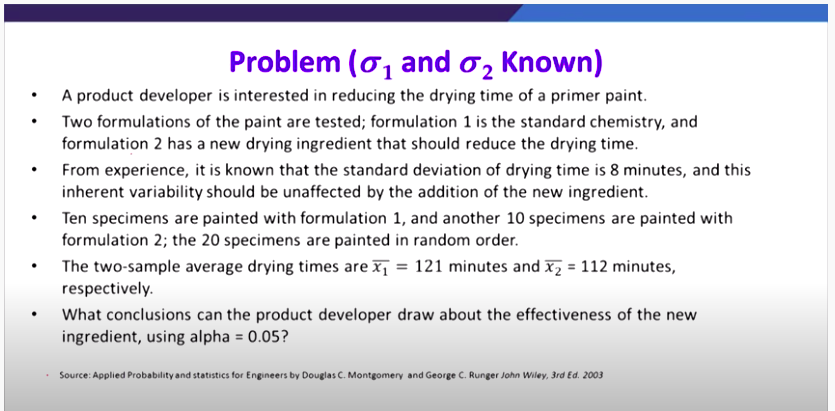

In [4]:
# x1=121 min
# x2=112 min
# sigma1=8 min
# sigma2=8 min
# alpha = 0.05
# n1=10
# n2=10
# Null Hypothesis : H0=mu1-mu2=0
# Alternate Hypothesis : H1=mu1-mu2>0
# The test statistic is z
# z=((x1-x2)-(mu1-mu2))/(sqrt((sigma1)^2/n1)+(sigma2)^2/n2))

In [10]:
def z_two_sample(x1,x2,mu1,mu2,sigma1,sigma2,n1,n2,alpha):
    z=((x1-x2)-(mu1-mu2))/(np.sqrt((sigma1)**2/n1+(sigma2)**2/n2))
    print('z:',z)
    if z>0:
        z2=stats.norm.ppf(alpha)
        print('z2:',(z2*-1))
    else:
        z2=stats.norm.ppf(alpha)
        print('z2:',(z2))
    
    if z>z2:
        print('Reject Null Hypothesis')
    else:
        print('Do not reject Null Hypothesis')        

In [11]:
z_two_sample(121,112,0,0,8,8,10,10,0.05)

z: 2.5155764746872635
z2: 1.6448536269514729
Reject Null Hypothesis


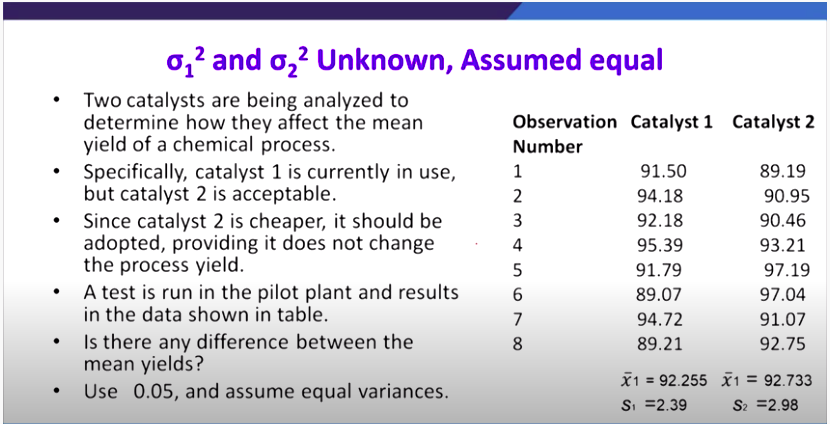

In [12]:
# x1=92.255
# x2=92.733
# sigma1=unknown
# sigma2=unknown
# s1=2.39
# s2=2.98
# n1=8
# n2=8
# alpha=0.05
# Null Hypothesis H0: mu1=mu2
# Alternate Hypotheis H1: mu1!=mu2
# t=((x1-x2)-(mu1-mu2))/sp*(((1/n1)+(1/n2)))**0.5

In [23]:
def t_two_test(x1,x2,mu1,mu2,s1,s2,n1,n2,alpha):
    # since it is a two tile test alpha=alpha/2
    alpha=alpha/2
    sp=np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
    t=((x1-x2)-(mu1-mu2))/(sp*(np.sqrt((1/n1)+(1/n2))))
    print('t: ',t)
    t2=stats.t.ppf(alpha,(n1+n2-2))
    print('t2: ',t2)
    if t<0 and t>t2:
        print('Do not reject null hypothesis')
    elif t>0 and t<t2:
        print('Do not reject null hypothesis')
    elif t<0 and t<t2:
        print('Reject Null Hypothesis')
    elif t>0 and t>t2:
        print('Reject Null Hypothesis')

In [24]:
t_two_test(92.255,92.733,0,0,2.39,2.98,8,8,0.05)

t:  -0.353922390875553
t2:  -2.1447866879169277
Do not reject null hypothesis


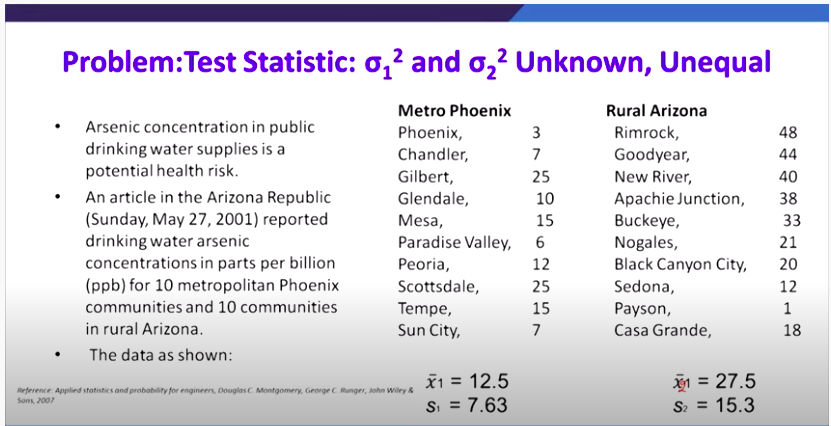

In [26]:
#x1=12.5
#x2=27.5
#sigma1=unknown
#sigma2=unknown
#s1=7.63
#s2=15.3
#n1=10
#n2=10
#alpha=0.05
# Null Hypothesis H0=mu1=mu2
# Alternate Hypothesis H1=mu1!=mu2

In [31]:
def t_two_test(x1,x2,mu1,mu2,s1,s2,n1,n2,alpha):
    # since it is a two tile test alpha=alpha/2
    alpha=alpha/2
    t=((x1-x2)-(mu1-mu2))/((np.sqrt((s1**2/n1)+(s2**2/n2))))
    print('t: ',t)
    er1=(s1**2/n1)
    er2=(s2**2/n2)
    v1=(n1-1)
    v2=(n2-1)
    v=(er1+er2)**2/((er1)**2/v1+(er2)**2/v2)
    t2=stats.t.ppf(alpha,(v))
    print('t2: ',t2)
    if t<0 and t>t2:
        print('Do not reject null hypothesis')
    elif t>0 and t<t2:
        print('Do not reject null hypothesis')
    elif t<0 and t<t2:
        print('Reject Null Hypothesis')
    elif t>0 and t>t2:
        print('Reject Null Hypothesis')

In [32]:
t_two_test(12.5,27.5,0,0,7.63,15.3,10,10,0.05)

t:  -2.7744169270368957
t2:  -2.156788799743921
Reject Null Hypothesis


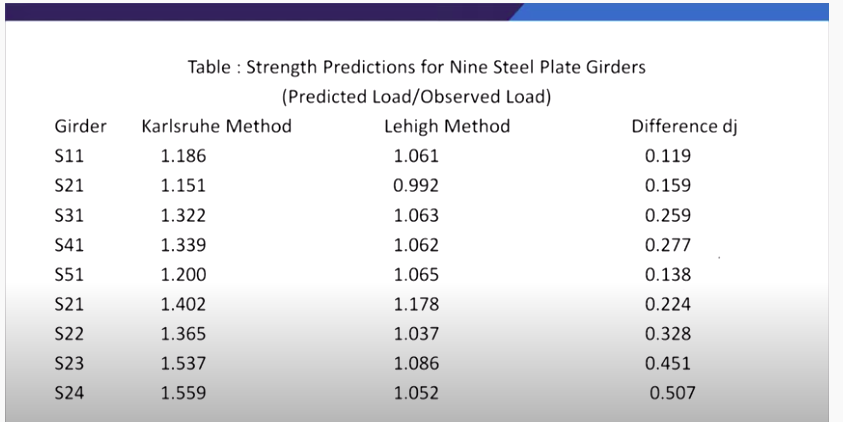

In [36]:
karl=[1.186,1.151,1.322,1.339,1.200,1.402,1.365,1.537,1.559]
lehigh=[1.061,0.992,1.063,1.062,1.065,1.178,1.037,1.086,1.052]

In [37]:
stats.ttest_rel(karl,lehigh)

Ttest_relResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066)

In [39]:
stats.t.ppf(0.025,8)

-2.306004135033371

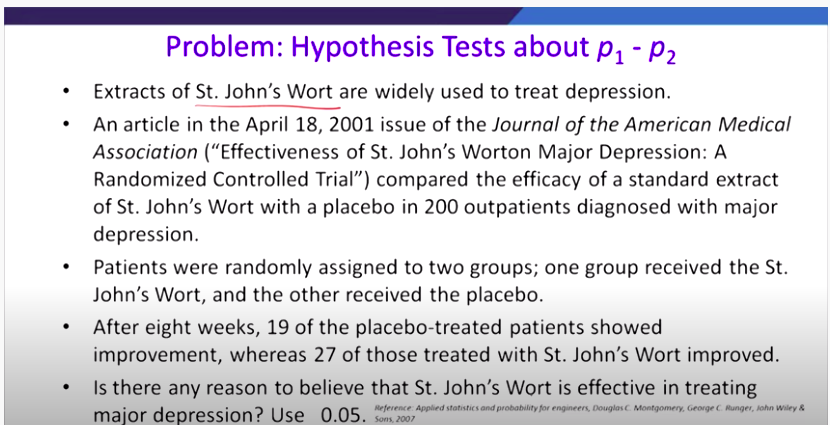

In [40]:
# n1=100
# n2=100
# p1=19
# p2=27
# alpha=0.05
# Null Hypothesis p1=p2
# Alternate Hypothesis

In [44]:
def proportion_test(p1,p2,n1,n2,alpha):
    p_pool=((p1*n2)+(p2*n1))/(n1+n2)
    x=((p_pool)*(1-p_pool))*((1/n1)+(1/n2))
    s=np.sqrt(x)
    z=(p1-p2)/s
    if z<0:
        p_val=stats.norm.cdf(z)
    else:
        p_val=1-stats.norm.cdf(z)
        
    return z,p_val*2

In [47]:
proportion_test(.27,.19,100,100,0.05)

(1.3442056254198995, 0.17888190308175567)

In [48]:
stats.norm.cdf(1.344)

0.9105258065485569

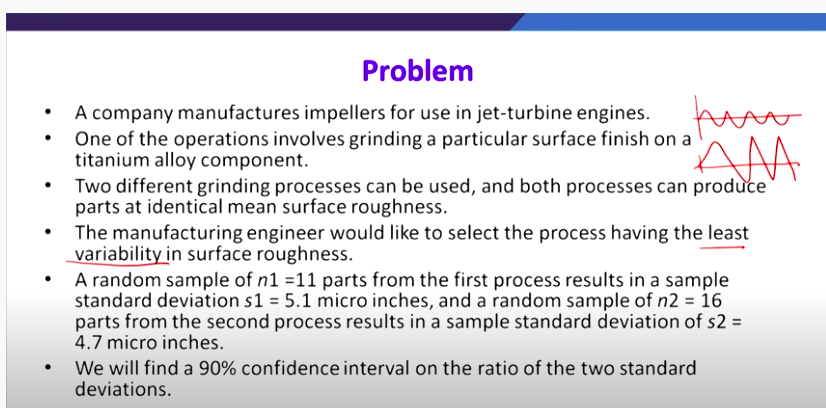

In [50]:
stats.f.ppf(0.95,dfn=15,dfd=10)

2.8450165269958436

In [51]:
stats.f.ppf(0.05,dfn=15,dfd=10)

0.3931252536255495

## F-test example

In [52]:
X=[3,7,25,10,15,6,12,25,15,7]
Y=[48,44,40,38,33,21,20,12,1,18]
F=np.var(X)/np.var(Y)
dfn=len(X)-1
dfd=len(Y)-1
p_value=stats.f.cdf(F,dfn,dfd)
p_value

0.024680183438910465

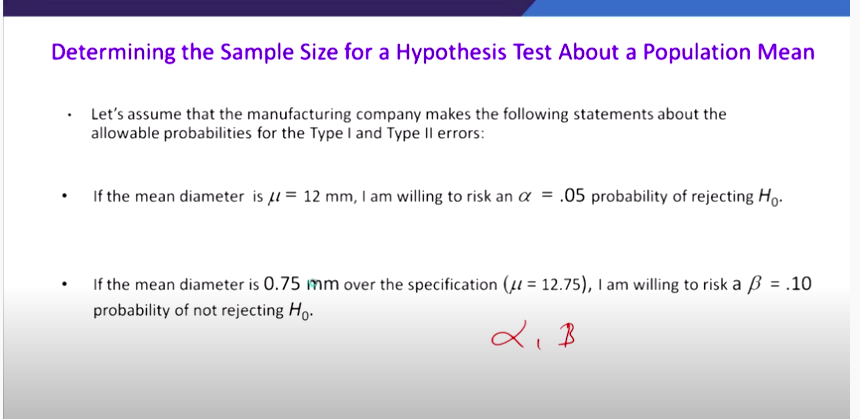

In [53]:
def samplesize(alpha,beta,mu1,mu2,sigma):
    z1=-1*stats.norm.ppf(alpha)
    z2=-1*stats.norm.ppf(beta)
    n=(((z1+z2)**2)*(sigma**2))/((mu1-mu2)**2)
    print(n)

In [54]:
samplesize(0.05,0.1,12,12.75,3.2)

155.900083325938
